In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv(r'C:\Users\KIIT\Desktop\8th sem project\student-por.csv')

# Selecting relevant features
features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
target = 'G3'

# Encode categorical features if they exist
categorical_features = ['schoolsup', 'famsup', 'higher']
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the improved ANN model with L2 Regularization and Early Stopping
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.4),  # Increased dropout to prevent overfitting
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='linear')  # Regression output
])

# Compile the model with improved optimizer and loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='huber_loss', metrics=['mae'])

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping and optimized batch size
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')

# Function for predicting student performance
def predict_performance(new_data):
    new_data_df = pd.DataFrame([new_data], columns=features)
    new_data_scaled = scaler.transform(new_data_df)
    prediction = model.predict(new_data_scaled)
    return round(prediction[0][0])

# Example prediction
new_student = [18, 4, 4, 2, 0, 3, 3, 1, 1, 5, 4]
predicted_score = predict_performance(new_student)
print(f'Predicted Final Grade (G3): {predicted_score}')


Epoch 1/150
33/33 [==============================] - 2s 12ms/step - loss: 9.1174 - mae: 9.4683 - val_loss: 5.7725 - val_mae: 6.1176
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 3.5516 - mae: 3.8657 - val_loss: 2.5762 - val_mae: 2.8761
Epoch 3/150
33/33 [==============================] - 0s 5ms/step - loss: 3.0286 - mae: 3.3436 - val_loss: 2.3699 - val_mae: 2.6703
Epoch 4/150
33/33 [==============================] - 0s 5ms/step - loss: 2.8588 - mae: 3.1707 - val_loss: 2.5355 - val_mae: 2.8423
Epoch 5/150
33/33 [==============================] - 0s 5ms/step - loss: 2.7631 - mae: 3.0752 - val_loss: 2.3374 - val_mae: 2.6556
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 2.7973 - mae: 3.1105 - val_loss: 2.2694 - val_mae: 2.5830
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 2.5733 - mae: 2.8955 - val_loss: 2.2502 - val_mae: 2.5628
Epoch 8/150
33/33 [==============================] - 0s 5ms/step - loss: 2.4564 - 

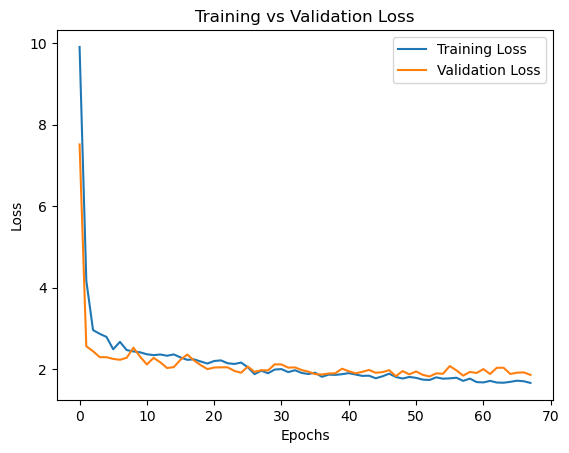

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


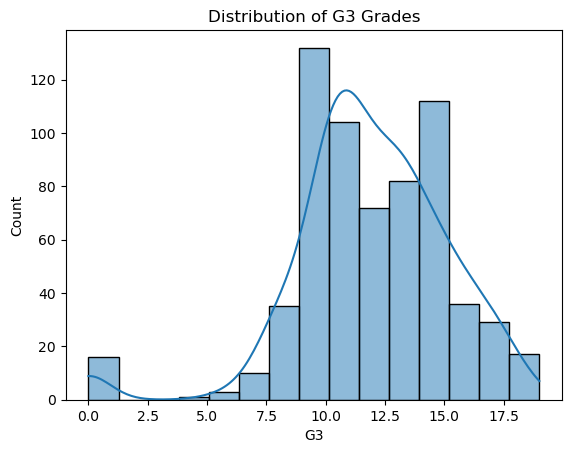

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Distribution of G3 Grades')
plt.show()

In [3]:
y_pred = model.predict(X_test)
print(y_pred[:10])  # Print the first 10 predictions

5/5 [==============================] - 0s 3ms/step
[[15.5365   ]
 [11.7469635]
 [15.397298 ]
 [14.716878 ]
 [11.394599 ]
 [14.154016 ]
 [13.952603 ]
 [ 9.099103 ]
 [12.207763 ]
 [11.107107 ]]


In [5]:
print("Feature Means (Before Scaling):", X.mean(axis=0))
print("Feature Means (After Scaling):", X_scaled.mean(axis=0))
print("Feature Std Dev (After Scaling):", X_scaled.std(axis=0))

Feature Means (Before Scaling): age          16.744222
Medu          2.514638
Fedu          2.306626
studytime     1.930663
failures      0.221880
freetime      3.180277
goout         3.184900
Dalc          1.502311
Walc          2.280431
health        3.536210
absences      3.659476
dtype: float64
Feature Means (After Scaling): [-1.75172323e-16 -1.09482702e-16 -3.28448106e-17  9.57973642e-17
  3.28448106e-17  1.86120593e-16  7.11637563e-17 -3.28448106e-17
  7.93749589e-17 -1.14956837e-16  2.18965404e-17]
Feature Std Dev (After Scaling): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
df = pd.read_csv(r'C:\Users\KIIT\Desktop\8th sem project\student-por.csv')

# Selecting relevant features
features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'freetime', 
            'goout', 'Dalc', 'Walc', 'health', 'absences']
target = 'G3'

# Encode categorical features
categorical_features = ['schoolsup', 'famsup', 'higher']
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='huber_loss', metrics=['mae'])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')

# Predicting Function
def predict_performance(new_data):
    new_data_df = pd.DataFrame([new_data], columns=features)
    new_data_scaled = scaler.transform(new_data_df)
    prediction = model.predict(new_data_scaled)
    return round(prediction[0][0])

# Example prediction
new_student = [18, 4, 4, 2, 0, 3, 3, 1, 1, 5, 4]
predicted_score = predict_performance(new_student)
print(f'Predicted Final Grade (G3): {predicted_score}')


Epoch 1/150
33/33 [==============================] - 2s 12ms/step - loss: 9.3648 - mae: 9.7152 - val_loss: 6.6203 - val_mae: 6.9677
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 3.6857 - mae: 4.0045 - val_loss: 2.5977 - val_mae: 2.9182
Epoch 3/150
33/33 [==============================] - 0s 5ms/step - loss: 3.0763 - mae: 3.3885 - val_loss: 2.3622 - val_mae: 2.6822
Epoch 4/150
33/33 [==============================] - 0s 5ms/step - loss: 2.7452 - mae: 3.0514 - val_loss: 2.1980 - val_mae: 2.4936
Epoch 5/150
33/33 [==============================] - 0s 5ms/step - loss: 2.6944 - mae: 3.0082 - val_loss: 2.4392 - val_mae: 2.7548
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 2.6794 - mae: 3.0026 - val_loss: 2.2515 - val_mae: 2.5592
Epoch 7/150
33/33 [==============================] - 0s 5ms/step - loss: 2.6691 - mae: 2.9895 - val_loss: 2.2060 - val_mae: 2.5158
Epoch 8/150
33/33 [==============================] - 0s 4ms/step - loss: 2.3474 - 